In [374]:
import numpy as np
from datascience import *
from datetime import date
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
default_dpi = plots.rcParamsDefault['figure.dpi']

We're using the [datascience](http://data8.org/datascience/) package that the Data 8 course uses.  Everything else we're using here is pretty standard.

To start with, let's make a table of the height and weight data we'll be working with.  For now, dates are just strings, but we'll fix that later!

In [375]:
heightweight = Table().with_columns([
    'Date',        ['07/28/2017', '08/07/2017', '08/25/2017', '09/25/2017', '11/28/2017', '01/26/2018', '04/27/2018', '07/30/2018'],
    'Height (cm)', [        53.3,         54.6,         55.9,           61,         63.5,         67.3,         71.1,         74.9],
    'Weight (kg)', [       4.204,         4.65,        5.425,         6.41,        7.985,        9.125,        10.39,       10.785],
                                    ])
heightweight

Date,Height (cm),Weight (kg)
07/28/2017,53.3,4.204
08/07/2017,54.6,4.65
08/25/2017,55.9,5.425
09/25/2017,61,6.41
11/28/2017,63.5,7.985
01/26/2018,67.3,9.125
04/27/2018,71.1,10.39
07/30/2018,74.9,10.785


Now we can plot weight as a function of height.

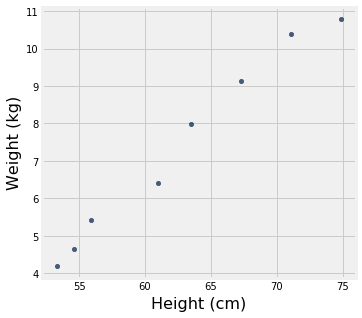

In [376]:
heightweight.scatter('Height (cm)', 'Weight (kg)')

Look at that!  Those dots aren't too far from being a straight line.  It looks as though height and weight are more or less linearly related!  We'll come back to that in a moment, but first, let's convert them to standard units.

A value in standard units is _how many standard deviations above the mean_ it is.  So, to convert a data point to standard units, we need the mean and the standard deviation of the data set that it came from.  Then we subtract the mean from it, and then divide that by the standard deviation  The `standard_units` function below, which comes [from the Data 8 textbook](https://www.inferentialthinking.com/chapters/14/2/Variability#standard-units), does this for a whole array of numbers at once.

In [377]:
def standard_units(nums):
    return (nums - np.mean(nums)) / np.std(nums)

Now we can create a version of the `heightweight` table that's in standard units. 

In [378]:
heightweight_standard = Table().with_columns(
    "Date", heightweight.column('Date'),
    "Height (standard units)", standard_units(heightweight.column('Height (cm)')),
    "Weight (standard units)", standard_units(heightweight.column('Weight (kg)')))
heightweight_standard

Date,Height (standard units),Weight (standard units)
07/28/2017,-1.26135,-1.3158
08/07/2017,-1.08691,-1.13054
08/25/2017,-0.912464,-0.808628
09/25/2017,-0.228116,-0.399485
11/28/2017,0.107349,0.254728
01/26/2018,0.617255,0.728253
04/27/2018,1.12716,1.2537
07/30/2018,1.63707,1.41777


And we can plot this data, just like we did with the data in original units.

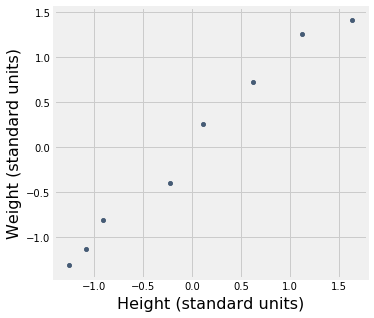

In [379]:
heightweight_standard.scatter('Height (standard units)', 'Weight (standard units)')

The data points on our plot are exactly the same.  Only the axes have changed.

Now that we've got standard units, though, it's easy to compute the correlation coefficient $r$.  First, we need to take the product of our $x$ and $y$ values -- in this case, height and weight -- for each data point.  We'll add a new column to our table that has these products.

In [380]:
heightweight_product = heightweight_standard.with_column(
    'Product of standard units',
    heightweight_standard.column('Height (standard units)') * heightweight_standard.column('Weight (standard units)'))
heightweight_product

Date,Height (standard units),Weight (standard units),Product of standard units
07/28/2017,-1.26135,-1.3158,1.65968
08/07/2017,-1.08691,-1.13054,1.22879
08/25/2017,-0.912464,-0.808628,0.737844
09/25/2017,-0.228116,-0.399485,0.091129
11/28/2017,0.107349,0.254728,0.0273447
01/26/2018,0.617255,0.728253,0.449518
04/27/2018,1.12716,1.2537,1.41312
07/30/2018,1.63707,1.41777,2.32099


To compute $r$, we just need to take the mean of the product column.

In [381]:
r = np.mean(heightweight_product.column('Product of standard units'))
r

0.9910523777994954

We see that $r$ is very close to 1, which means that our data has an almost perfect linear correlation.

What does "almost perfect" look like?  Now that we have $r$, we can plot the regression line.  (To be specific, we're plotting a segment of the regression line that goes from -2 to 2 on the $x$-axis, but we could plot a longer segment if we wanted to.)

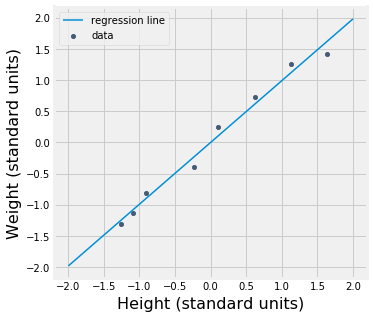

In [382]:
heightweight_standard.scatter("Height (standard units)", "Weight (standard units)", label="data")
x = np.array(range(-2, 3))  
y = r * x # <-- the regression equation!
plots.plot(x, y, label="regression line", linewidth=1.5)  
plots.legend();

Since $r$ is so close to 1, the regression line is awfully close to $y = x$, a perfect linear correlation.  Let's plot that line, too.

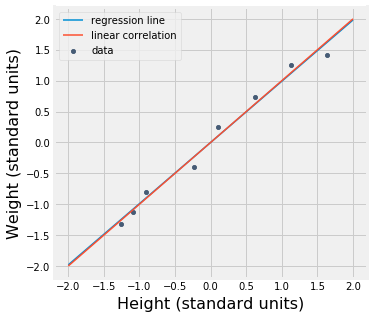

In [386]:
heightweight_standard.scatter("Height (standard units)", "Weight (standard units)", label="data")
x = np.array(range(-2, 3))  
y = r * x # <-- the regression equation
plots.plot(x, y, label="regression line", linewidth=1.5)  
y = x # <-- linear correlation
plots.plot(x, y, label="linear correlation", linewidth=1.5)  
plots.legend();

We can see that the slope of the actual regression line is just sliiiiightly smaller than the slope of the line $y = x$.  That is, the regression line is slightly higher than the red line on the left side of the plot, and slightly lower on the right side.  If we scale up the plot size and tweak the line width and range of the axes, we can see this a bit more clearly.

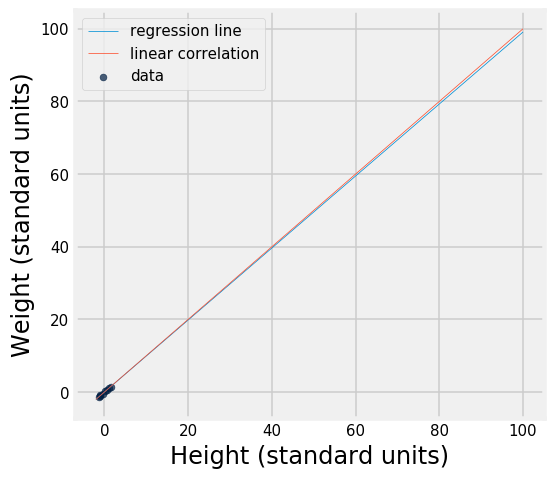

In [388]:
original_dpi = plots.rcParams['figure.dpi']
plots.rcParams['figure.dpi'] = plots.rcParams['figure.dpi'] * 1.5
heightweight_standard.scatter("Height (standard units)", "Weight (standard units)", label="data")
x = np.array(range(-2, 101))  
y = r * x # <-- the regression equation
plots.plot(x, y, label="regression line", linewidth=0.5)  
y = x # <-- linear correlation
plots.plot(x, y, label="linear correlation", linewidth=0.5)  
plots.legend()
plots.rcParams['figure.dpi'] = original_dpi

Just one more thing.  We've seen that the relationship between height and weight is very well captured by a linear model.  But what about the relationship between height and time, or weight and time?

Let's go back to our original table and look at the date column.  To make dates easier to work with, let's convert them to Python date objects instead of strings.

In [389]:
heightweight_dates = heightweight.with_columns(
   "Date",
    [datetime.strptime(date, "%m/%d/%Y").date() for date in heightweight.column(0)])
heightweight_dates

Date,Height (cm),Weight (kg)
2017-07-28,53.3,4.204
2017-08-07,54.6,4.65
2017-08-25,55.9,5.425
2017-09-25,61,6.41
2017-11-28,63.5,7.985
2018-01-26,67.3,9.125
2018-04-27,71.1,10.39
2018-07-30,74.9,10.785


We can now compute the number of days since birth for each row in our data set.  Sylvia was born on July 24, 2017, so we'll define that date to be her `birthday` and work from there.

In [390]:
birthday = date(2017,7,24)
days_since_birth = [(date - birthday).days for date in heightweight_dates.column('Date')]
heightweight_with_days = heightweight_dates.with_columns("Days since birth", days_since_birth)
heightweight_with_days

Date,Height (cm),Weight (kg),Days since birth
2017-07-28,53.3,4.204,4
2017-08-07,54.6,4.65,14
2017-08-25,55.9,5.425,32
2017-09-25,61,6.41,63
2017-11-28,63.5,7.985,127
2018-01-26,67.3,9.125,186
2018-04-27,71.1,10.39,277
2018-07-30,74.9,10.785,371


And now we can easily plot the relationship between days since birth and height, and the relationship between days since birth and weight.

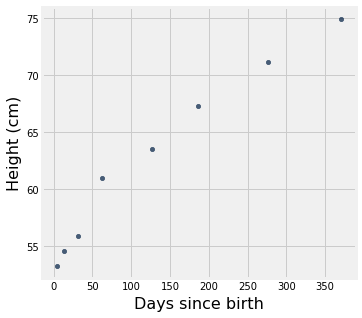

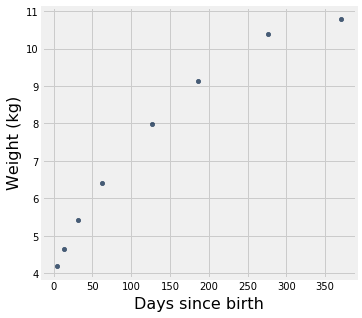

In [391]:
heightweight_with_days.scatter('Days since birth', 'Height (cm)')
heightweight_with_days.scatter('Days since birth', 'Weight (kg)')

How linear are these relationships?  We can find out by computing $r$ for each relationship.

In [392]:
heightweight_with_days_standard = Table().with_columns(
    "Date", heightweight_with_days.column('Date'),
    "Height (standard units)", standard_units(heightweight_with_days.column('Height (cm)')),
    "Weight (standard units)", standard_units(heightweight_with_days.column('Weight (kg)')),
    "Days since birth (standard units)", standard_units(heightweight_with_days.column('Days since birth'))
)
heightweight_with_days_product = heightweight_with_days_standard.with_columns(
    "Product of days and height in standard units",
    heightweight_with_days_standard.column('Height (standard units)') * heightweight_with_days_standard.column('Days since birth (standard units)'),
    "Product of days and weight in standard units",
    heightweight_with_days_standard.column('Weight (standard units)') * heightweight_with_days_standard.column('Days since birth (standard units)'))
heightweight_with_days_product

r_days_height = np.mean(heightweight_with_days_product.column('Product of days and height in standard units'))
print("r_days_height:", r_days_height)
r_days_weight = np.mean(heightweight_with_days_product.column('Product of days and weight in standard units'))
print("r_days_weight:", r_days_weight)

r_days_height: 0.9798241135426988
r_days_weight: 0.9646449280709019


Both of these are pretty close to 1, but less so than the relationship between height and weight.

Let's plot the regression lines:

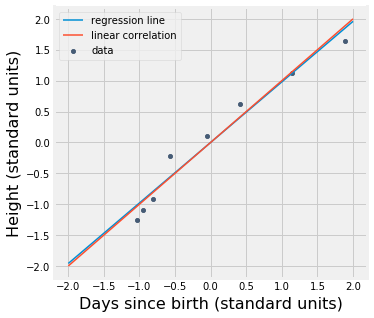

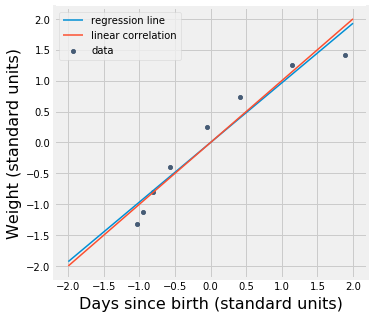

In [393]:
heightweight_with_days_standard.scatter("Days since birth (standard units)", "Height (standard units)", label="data")
x = np.array(range(-2, 3))  
y = r_days_height * x # <-- the regression equation
plots.plot(x, y, label="regression line", linewidth=1.5)  
y = x # <-- linear correlation
plots.plot(x, y, label="linear correlation", linewidth=1.5)  
plots.legend()

heightweight_with_days_standard.scatter("Days since birth (standard units)", "Weight (standard units)", label="data")
x = np.array(range(-2, 3))  
y = r_days_weight * x # <-- the regression equation
plots.plot(x, y, label="regression line", linewidth=1.5)  
y = x # <-- linear correlation
plots.plot(x, y, label="linear correlation", linewidth=1.5)
plots.legend();

Although $r$ is pretty close to 1 in each case, the shape of the scatter plot looks to me like the data would be better modeled by an exponential model.  Maybe the next part of the course will talk about those.